In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict


In [14]:
''' I don't tink month col needs to put into the consideration, i was thining about time serires model,
 but I don't think the training population is enough to predict another 12 months '''
data = pd.read_csv('active_user.csv', header = 0 )


" I don't tink month col needs to put into the consideration, i was thining about time serires model,\n but I don't think the training population is enough to predict another 12 months "

In [16]:
test

,Users,Pageviews,Active Users
0,35800.0,848280.0,23881.63
1,36280.0,1080814.0,26855.11
2,35760.0,1108462.0,24173.67
3,37960.0,1478791.0,23421.84
4,38420.0,1900271.0,24372.17
5,37160.0,1886562.0,25428.86
6,40690.0,1449944.0,28632.92
7,41470.0,1495609.0,23247.43
8,36790.0,1924023.0,22590.86
9,44070.0,2182889.0,28883.42


In [15]:
test=data.iloc[0:12, 1:]
test.corr()['Active Users']

Users           0.603282
Pageviews       0.357676
Active Users    1.000000
Name: Active Users, dtype: float64

In [18]:
'''split x and y into Numpy'''
x= test[['Users', 'Pageviews']].to_numpy()
y= test['Active Users'].to_numpy()


In [20]:
#leave one out for LinearRegression , tempting to use users as x only 
loo = LeaveOneOut()
y_true, y_pred = list(), list()
for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index, :], x[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model= LinearRegression()
    model.fit(x_train, y_train)
    yhat= model.predict(x_test)
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
r2 = metrics.r2_score(y_true, y_pred)
print ('r2:', r2)

r2: -0.19816939779916942


In [22]:
model.predict(data[['Users', 'Pageviews' ]].loc[12:].to_numpy())

array([28957.19337179, 27912.01637274, 28222.44735074, 28679.13714102,
       28873.14398286, 29007.00145799, 31561.03561307, 31659.99868066,
       28407.36012005, 33897.18723846, 31668.62458789, 27421.8251545 ])

Cross-Predicted R2: -0.15246889598483437


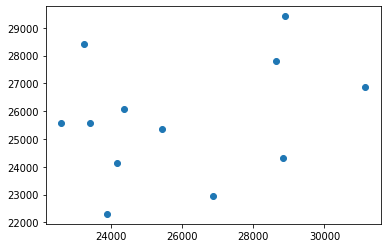

In [27]:
#6 fold cross valadition 
modeel=  LinearRegression()
scores = cross_val_score(model, x, y, cv=6)
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)
r2 = metrics.r2_score(y, predictions)
print ('Cross-Predicted R2:', r2)